In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
os.chdir("drive/My Drive/Colab Notebooks/")
data = pd.read_excel("AML_Group_Project_Dataset.xlsx")
data.head()

,Unnamed: 0,Participant_Stimuli,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,Hbo_Op10,Hbo_Op11,Hbo_Op12,Hbo_Op13,Hbo_Op14,Hbo_Op15,Hbo_Op16,Hbr_Op1,Hbr_Op2,Hbr_Op3,Hbr_Op4,Hbr_Op5,Hbr_Op6,Hbr_Op7,Hbr_Op8,Hbr_Op9,Hbr_Op10,Hbr_Op11,Hbr_Op12,Hbr_Op13,Hbr_Op14,Hbr_Op15,Hbr_Op16,Hbt_Op1,Hbt_Op2,Hbt_Op3,Hbt_Op4,Hbt_Op5,Hbt_Op6,Hbt_Op7,Hbt_Op8,Hbt_Op9,Hbt_Op10,Hbt_Op11,Hbt_Op12,Hbt_Op13,Hbt_Op14,Hbt_Op15,Hbt_Op16,Oxy_Op1,Oxy_Op2,Oxy_Op3,Oxy_Op4,Oxy_Op5,Oxy_Op6,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16,measurement,ResponseCode,TypeCode,AgeCode,SexCode
0,0,2_1,0.024675,-0.015218,0.032464,0.058835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002910,NaN,NaN,0.045010,0.001022,0.052551,0.035209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052528,NaN,NaN,0.069685,-0.014196,0.085015,0.094044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055438,NaN,NaN,-0.020335,-0.016239,-0.020087,0.023625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049618,NaN,NaN,0,1.0,1.0,1,1
1,1,2_1,0.030511,-0.012349,0.039233,0.074926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003348,NaN,NaN,0.053890,0.000589,0.060653,0.040470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075030,NaN,NaN,0.084401,-0.011760,0.099886,0.115395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071682,NaN,NaN,-0.023379,-0.012938,-0.021419,0.034456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078378,NaN,NaN,1,1.0,1.0,1,1
2,2,2_1,0.039081,-0.004290,0.048589,0.094117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003982,NaN,NaN,0.058895,-0.002358,0.063509,0.041851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090856,NaN,NaN,0.097976,-0.006647,0.112098,0.135968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086874,NaN,NaN,-0.019813,-0.001932,-0.014920,0.052266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.094838,NaN,NaN,2,1.0,1.0,1,1
3,3,2_1,0.050448,0.008479,0.060856,0.115959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003388,NaN,NaN,0.059176,-0.008715,0.060312,0.038532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095729,NaN,NaN,0.109625,-0.000236,0.121168,0.154490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099117,NaN,NaN,-0.008728,0.017194,0.000544,0.077427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.092341,NaN,NaN,3,1.0,1.0,1,1
4,4,2_1,0.064245,0.024718,0.075855,0.139330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019458,NaN,NaN,0.054452,-0.018922,0.051060,0.030282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087221,NaN,NaN,0.118697,0.005796,0.126915,0.169612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106679,NaN,NaN,0.009794,0.043639,0.024794,0.109047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067763,NaN,NaN,4,1.0,1.0,1,1


In [5]:
print(data.shape)
print(data.describe)
print(data.info())

(81740, 71)
<bound method NDFrame.describe of        Unnamed: 0 Participant_Stimuli   Hbo_Op1  ...  TypeCode  AgeCode  SexCode
0               0                 2_1  0.024675  ...       1.0        1        1
1               1                 2_1  0.030511  ...       1.0        1        1
2               2                 2_1  0.039081  ...       1.0        1        1
3               3                 2_1  0.050448  ...       1.0        1        1
4               4                 2_1  0.064245  ...       1.0        1        1
...           ...                 ...       ...  ...       ...      ...      ...
81735       81735              172_30  0.047532  ...       2.0        1        0
81736       81736              172_30  0.057649  ...       2.0        1        0
81737       81737              172_30  0.066079  ...       2.0        1        0
81738       81738              172_30  0.074707  ...       2.0        1        0
81739       81739              172_30  0.085232  ...       2.0 

In [7]:
pd.DataFrame(data.isna().sum())

,0
Unnamed: 0,0
Participant_Stimuli,0
Hbo_Op1,18301
Hbo_Op2,8842
Hbo_Op3,5203
...,...
measurement,0
ResponseCode,4064
TypeCode,484
AgeCode,0


In [ ]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.3f}".format
from google.colab import widgets

from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': data, 'name': 'Data'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
for i in range(1,33): 
    plt.subplot(8, 4, i)
    plt.tight_layout()
    plt.hist(data.iloc[:,i],30)
    plt.title(data.columns[i])

In [ ]:
for i in range(33,65): 
    plt.subplot(8, 4, i-32)
    plt.tight_layout()
    plt.hist(data.iloc[:,i],30)
    plt.title(data.columns[i])

## Data Imputation

In [ ]:
#deleting response nan
data = data.dropna(,axis=0).reset_index()


### Deneme 1 (z-score)

In [31]:
pd.DataFrame(data.isna().sum()).iloc[50:,0]

Oxy_Op1            0
Oxy_Op2            0
Oxy_Op3            0
Oxy_Op4            0
Oxy_Op5            0
Oxy_Op6            0
Oxy_Op7            0
Oxy_Op8            0
Oxy_Op9            0
Oxy_Op10           0
Oxy_Op11           0
Oxy_Op12           0
Oxy_Op13           0
Oxy_Op14           0
Oxy_Op15           0
Oxy_Op16           0
measurement        0
ResponseCode    4064
TypeCode         484
AgeCode            0
SexCode            0
Name: 0, dtype: int64

In [233]:
#filling nan's (outlier çıkarıyor ortalama alırken)
def filling_val(array):
  temp = np.array(array)
  temp2 = [x for x in temp if np.isnan(x) == False]
  z = np.abs(stats.zscore(temp2))
  ind1 = np.where(z > 3)
  ind2 = ind1[0].tolist()
  orj = temp2.copy()
  for i in ind2:
    k = temp2[i]
    orj.remove(k)
  return np.mean(orj)

pre = data.copy()

for col in pre.iloc[:,2:66].columns:
  pre[col].fillna(filling_val(pre[col]), inplace=True)

#outlier removing
pre2 = pre.dropna(axis=0).reset_index()
sel_index = pre2.iloc[:,0]
clean = pre2.iloc[:,3:67].copy()
clean2=clean[(np.abs(stats.zscore(clean)) <= 3).all(axis=1)].reset_index()
sel_index2 = clean2.iloc[:,0]
clean2

,index,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,Hbo_Op10,Hbo_Op11,Hbo_Op12,Hbo_Op13,Hbo_Op14,Hbo_Op15,Hbo_Op16,Hbr_Op1,Hbr_Op2,Hbr_Op3,Hbr_Op4,Hbr_Op5,Hbr_Op6,Hbr_Op7,Hbr_Op8,Hbr_Op9,Hbr_Op10,Hbr_Op11,Hbr_Op12,Hbr_Op13,Hbr_Op14,Hbr_Op15,Hbr_Op16,Hbt_Op1,Hbt_Op2,Hbt_Op3,Hbt_Op4,Hbt_Op5,Hbt_Op6,Hbt_Op7,Hbt_Op8,Hbt_Op9,Hbt_Op10,Hbt_Op11,Hbt_Op12,Hbt_Op13,Hbt_Op14,Hbt_Op15,Hbt_Op16,Oxy_Op1,Oxy_Op2,Oxy_Op3,Oxy_Op4,Oxy_Op5,Oxy_Op6,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16
0,0,0.024675,-0.015218,0.032464,0.058835,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.002910,0.00153,-0.002817,0.045010,0.001022,0.052551,0.035209,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.052528,0.001639,-0.017059,0.069685,-0.014196,0.085015,0.094044,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.055438,0.000959,-0.018717,-0.020335,-0.016239,-0.020087,0.023625,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.049618,-0.000364,0.014018
1,1,0.030511,-0.012349,0.039233,0.074926,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,-0.003348,0.00153,-0.002817,0.053890,0.000589,0.060653,0.040470,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.075030,0.001639,-0.017059,0.084401,-0.011760,0.099886,0.115395,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.071682,0.000959,-0.018717,-0.023379,-0.012938,-0.021419,0.034456,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.078378,-0.000364,0.014018
2,2,0.039081,-0.004290,0.048589,0.094117,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,-0.003982,0.00153,-0.002817,0.058895,-0.002358,0.063509,0.041851,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.090856,0.001639,-0.017059,0.097976,-0.006647,0.112098,0.135968,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.086874,0.000959,-0.018717,-0.019813,-0.001932,-0.014920,0.052266,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.094838,-0.000364,0.014018
3,3,0.050448,0.008479,0.060856,0.115959,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.003388,0.00153,-0.002817,0.059176,-0.008715,0.060312,0.038532,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.095729,0.001639,-0.017059,0.109625,-0.000236,0.121168,0.154490,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.099117,0.000959,-0.018717,-0.008728,0.017194,0.000544,0.077427,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.092341,-0.000364,0.014018
4,4,0.064245,0.024718,0.075855,0.139330,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.019458,0.00153,-0.002817,0.054452,-0.018922,0.051060,0.030282,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.087221,0.001639,-0.017059,0.118697,0.005796,0.126915,0.169612,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.106679,0.000959,-0.018717,0.009794,0.043639,0.024794,0.109047,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.067763,-0.000364,0.014018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60003,77670,0.034821,-0.115473,0.171372,0.236536,-0.010133,0.203421,-0.008541,0.075152,0.095367,0.170726,-0.008445,0.129385,-0.171005,0.020026,0.00153,-0.530636,-0.138584,0.035375,0.002690,-0.03513

### Deneme 2 (Isolation Forest)

In [234]:
from sklearn.ensemble import IsolationForest

pre_clean =  MinMaxScaler().fit_transform(clean)
clf_is = IsolationForest(max_samples=100, random_state=0)
clf_is.fit(pre_clean)
y_pred_is = clf_is.predict(pre_clean)
clean3 = clean[np.where(y_pred_is == 1, True, False)].reset_index()
clean3

,index,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,Hbo_Op10,Hbo_Op11,Hbo_Op12,Hbo_Op13,Hbo_Op14,Hbo_Op15,Hbo_Op16,Hbr_Op1,Hbr_Op2,Hbr_Op3,Hbr_Op4,Hbr_Op5,Hbr_Op6,Hbr_Op7,Hbr_Op8,Hbr_Op9,Hbr_Op10,Hbr_Op11,Hbr_Op12,Hbr_Op13,Hbr_Op14,Hbr_Op15,Hbr_Op16,Hbt_Op1,Hbt_Op2,Hbt_Op3,Hbt_Op4,Hbt_Op5,Hbt_Op6,Hbt_Op7,Hbt_Op8,Hbt_Op9,Hbt_Op10,Hbt_Op11,Hbt_Op12,Hbt_Op13,Hbt_Op14,Hbt_Op15,Hbt_Op16,Oxy_Op1,Oxy_Op2,Oxy_Op3,Oxy_Op4,Oxy_Op5,Oxy_Op6,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16
0,0,0.024675,-0.015218,0.032464,0.058835,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.002910,0.00153,-0.002817,0.045010,0.001022,0.052551,0.035209,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.052528,0.001639,-0.017059,0.069685,-0.014196,0.085015,0.094044,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.055438,0.000959,-0.018717,-0.020335,-0.016239,-0.020087,0.023625,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.049618,-0.000364,0.014018
1,1,0.030511,-0.012349,0.039233,0.074926,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,-0.003348,0.00153,-0.002817,0.053890,0.000589,0.060653,0.040470,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.075030,0.001639,-0.017059,0.084401,-0.011760,0.099886,0.115395,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.071682,0.000959,-0.018717,-0.023379,-0.012938,-0.021419,0.034456,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.078378,-0.000364,0.014018
2,2,0.039081,-0.004290,0.048589,0.094117,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,-0.003982,0.00153,-0.002817,0.058895,-0.002358,0.063509,0.041851,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.090856,0.001639,-0.017059,0.097976,-0.006647,0.112098,0.135968,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.086874,0.000959,-0.018717,-0.019813,-0.001932,-0.014920,0.052266,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.094838,-0.000364,0.014018
3,3,0.050448,0.008479,0.060856,0.115959,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.003388,0.00153,-0.002817,0.059176,-0.008715,0.060312,0.038532,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.095729,0.001639,-0.017059,0.109625,-0.000236,0.121168,0.154490,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.099117,0.000959,-0.018717,-0.008728,0.017194,0.000544,0.077427,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.092341,-0.000364,0.014018
4,4,0.064245,0.024718,0.075855,0.139330,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.019458,0.00153,-0.002817,0.054452,-0.018922,0.051060,0.030282,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.087221,0.001639,-0.017059,0.118697,0.005796,0.126915,0.169612,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.106679,0.000959,-0.018717,0.009794,0.043639,0.024794,0.109047,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.067763,-0.000364,0.014018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70820,77671,0.047532,-0.110554,0.196474,0.261890,-0.012670,0.204857,-0.011992,0.082482,0.070932,0.189418,-0.012588,0.154542,-0.182753,0.028790,0.00153,-0.558346,-0.152954,0.033928,-0.021223,-0.0441

### Deneme 3

In [ ]:
columns = data.columns
def ImputeWithMean(df_data, cols=columns):

  df_data = pd.DataFrame(df_data[cols])
  mean_imputer = SimpleImputer(strategy="mean")
  mean_imputer.fit(df_data)
    
  imputed_df = mean_imputer.transform(df_data)
  imputed_df = pd.DataFrame(imputed_df, columns=df_data.columns)

  return imputed_df

data_1 = ImputeWithMean(data_1)
data_2 = ImputeWithMean(data_2)
data_3 = ImputeWithMean(data_3)

frames = [data_1, data_2, data_3]
data = pd.concat(frames)
data

### Deneme 4

16 seansların ortlamasını alarak da deneyebiliriz

# Machine Learning Approach

## Random Forests

Isolation Forest ile yaptım.

In [235]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.utils import np_utils
from keras.utils import to_categorical

rnd = 50

X = clean3.iloc[:,1:]

indexis = clean3.iloc[:,0].to_list()
yr = pd.DataFrame(data.iloc[:,67].copy())
yr = pd.DataFrame(yr.loc[sel_index.to_list(),:].reset_index(drop = True))
yr = pd.DataFrame(yr.iloc[indexis,:].reset_index(drop = True))

yt = pd.DataFrame(data.iloc[:,68].copy())
yt = pd.DataFrame(yt.loc[sel_index.to_list(),:].reset_index(drop = True))
yt = pd.DataFrame(yt.iloc[indexis,:].reset_index(drop = True))


#y_arr = np_utils.to_categorical(yr-1, num_classes=3)

#for ResponseCode


#y_arr = np_utils.to_categorical(yr-1, num_classes=3)
X_arr = StandardScaler().fit_transform(X)

X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_arr, yr, test_size=0.3, random_state = rnd)

#for TypeCode

X_art = StandardScaler().fit_transform(X)

X_traint, X_testt, y_traint, y_testt = train_test_split(X_art, yt, test_size=0.3, random_state = rnd)

### ResponesCode Classification

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, cross_validate
from time import time

s1 = time()
selector = SelectFromModel(RandomForestClassifier()).fit(X_trainr, y_trainr)
s2 = time()
print("Passed time for Feature Selection:",s2-s1)
X_rnd_trainr = selector.transform(X_trainr)
X_rnd_testr = selector.transform(X_testr)

print("Selected Columns:",X.loc[:,selector.get_support()].columns.tolist(),"\n")
s3 = time()
models = RandomForestClassifier(random_state = rnd)
cv = cross_validate(models,X_rnd_trainr,y_trainr,cv = 3, n_jobs=-1, return_estimator=True)
s4 = time()
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_rnd_testr,y_testr)))
print("Passed time for Cross Validation:",s4-s3)

Selected Columns: ['Hbo_Op2', 'Hbo_Op16', 'Hbr_Op1', 'Hbr_Op2', 'Hbr_Op3', 'Hbr_Op4', 'Hbr_Op5', 'Hbr_Op6', 'Hbr_Op7', 'Hbr_Op8', 'Hbr_Op9', 'Hbr_Op12', 'Hbr_Op14', 'Hbr_Op16', 'Hbt_Op1', 'Hbt_Op2', 'Hbt_Op3', 'Hbt_Op4', 'Hbt_Op5', 'Hbt_Op6', 'Hbt_Op7', 'Hbt_Op8', 'Hbt_Op9', 'Hbt_Op10', 'Hbt_Op11', 'Hbt_Op12', 'Hbt_Op13', 'Hbt_Op14', 'Hbt_Op16', 'Oxy_Op1', 'Oxy_Op2', 'Oxy_Op4'] 

Mean training accuracy: 0.8804082883134258
Test accuracy: 0.8828125
Passed time for Cross Validation: 69.72065687179565


#### Hyper Parameter Tuning


In [202]:
#uzun sürer diye çalıştırmadım
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

param_rnd = {"min_samples_split" : [2,10,50],
             "criterion" : ["gini","entropy"],
             "ccp_alpha": [1e-5,1e-4,1e-3,0.01,0.1,0] }


ran_forest = RandomForestClassifier(random_state = rnd)

clf_rnd = GridSearchCV(ran_forest, param_rnd, cv=3, n_jobs = -1)
clf_rnd.fit(X_rnd_trainr, y_trainr)

print("Tuned Random Forest Classification Parameters: {}".format(clf_rnd.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_rnd.best_score_))
print("Test Score {:.6f}".format(clf_rnd.score(X_rnd_testr,y_testr)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_rnd.refit_time_))

KeyboardInterrupt: ignored

In [216]:
mmodel = RandomForestClassifier(ccp_alpha=0.00001,random_state = rnd)
cv = cross_validate(mmodel,X_rnd_trainr,y_trainr,cv = 3, n_jobs=-1, return_estimator=True)
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_rnd_testr,y_testr)))

Mean training accuracy: 0.8776069081937875
Test accuracy: 0.8800629740947474


In [218]:
from sklearn.metrics import classification_report
y_pred_rndr = cv["estimator"][0].predict(X_rnd_testr)
print(classification_report(y_testr,y_pred_rndr))

              precision    recall  f1-score   support

         1.0       0.88      0.90      0.89      8579
         2.0       0.98      0.61      0.75      2546
         3.0       0.87      0.93      0.90      9836

    accuracy                           0.88     20961
   macro avg       0.91      0.81      0.85     20961
weighted avg       0.89      0.88      0.88     20961



### TypeCode Classification

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, cross_validate
from time import time

s1 = time()
selector2 = SelectFromModel(RandomForestClassifier()).fit(X_traint, y_traint)
s2 = time()
print("Passed time for Feature Selection:",s2-s1)
X_rnd_traint = selector2.transform(X_traint)
X_rnd_testt = selector2.transform(X_testt)

print("Selected Columns:",X.loc[:,selector2.get_support()].columns.tolist(),"\n")
s3 = time()
models = RandomForestClassifier(random_state = rnd)
cv = cross_validate(models,X_rnd_traint,y_traint,cv = 3, n_jobs=-1, return_estimator=True)
s4 = time()
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_rnd_testt,y_testt)))
print("Passed time for Cross Validation:",s4-s3)

Passed time for Feature Selection: 62.641599893569946
Selected Columns: ['Hbo_Op2', 'Hbo_Op16', 'Hbr_Op1', 'Hbr_Op2', 'Hbr_Op3', 'Hbr_Op4', 'Hbr_Op5', 'Hbr_Op6', 'Hbr_Op7', 'Hbr_Op8', 'Hbr_Op9', 'Hbr_Op10', 'Hbr_Op11', 'Hbr_Op12', 'Hbr_Op14', 'Hbr_Op16', 'Hbt_Op1', 'Hbt_Op2', 'Hbt_Op3', 'Hbt_Op4', 'Hbt_Op5', 'Hbt_Op6', 'Hbt_Op7', 'Hbt_Op8', 'Hbt_Op9', 'Hbt_Op10', 'Hbt_Op11', 'Hbt_Op12', 'Hbt_Op13', 'Hbt_Op14', 'Hbt_Op16', 'Oxy_Op2', 'Oxy_Op3', 'Oxy_Op4'] 

Mean training accuracy: 0.8967448589717013
Test accuracy: 0.8948046371833405
Passed time for Cross Validation: 76.36390590667725


#### Hyperparamter Tuning

In [ ]:
#uzun sürer diye çalıştırmadım
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

param_rnd = {"min_samples_split" : [2,10,50],
             "criterion" : ["gini","entropy"],
             "ccp_alpha": [1e-5,1e-4,1e-3,0.01,0.1,0] }


ran_forest = RandomForestClassifier(random_state = rnd)

clf_rnd2 = GridSearchCV(ran_forest, param_rnd, cv=3, n_jobs = -1)
clf_rnd2.fit(X_rnd_traint, y_traint)

print("Tuned Random Forest Classification Parameters: {}".format(clf_rnd2.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_rnd2.best_score_))
print("Test Score {:.6f}".format(clf_rnd2.score(X_rnd_testt,y_testt)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_rnd2.refit_time_))

## Random Forests(z-score outlier deleting)

In [229]:
X.shape

(60088, 63)

In [230]:
rnd = 50

X = clean2.iloc[:,1:]

yr = pd.DataFrame(data.iloc[:,67].copy())
yr = pd.DataFrame(yr.loc[sel_index.to_list(),:].reset_index(drop = True))
yr = yr.loc[sel_index2.to_list(),:].reset_index(drop = True)
yr = yr.to_clipboard

yt = pd.DataFrame(data.iloc[:,68].copy())
yt = pd.DataFrame(yt.loc[sel_index.to_list(),:].reset_index(drop = True))
yt = yt.loc[sel_index2.to_list(),:].reset_index(drop = True)


#for ResponseCode
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.utils import np_utils

y_arr = np_utils.to_categorical(yr-1, num_classes=3)
X_arr = StandardScaler().fit_transform(X)

X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_arr, y_arr, test_size=0.3, random_state = 127)

#for TypeCode

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.utils import np_utils

y_art = np_utils.to_categorical(yt-1, num_classes=3)
X_art = StandardScaler().fit_transform(X)

X_traint, X_testt, y_traint, y_testt = train_test_split(X_art, y_art, test_size=0.3, random_state = rnd)

,index,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,Hbo_Op10,Hbo_Op11,Hbo_Op12,Hbo_Op13,Hbo_Op14,Hbo_Op15,Hbo_Op16,Hbr_Op1,Hbr_Op2,Hbr_Op3,Hbr_Op4,Hbr_Op5,Hbr_Op6,Hbr_Op7,Hbr_Op8,Hbr_Op9,Hbr_Op10,Hbr_Op11,Hbr_Op12,Hbr_Op13,Hbr_Op14,Hbr_Op15,Hbr_Op16,Hbt_Op1,Hbt_Op2,Hbt_Op3,Hbt_Op4,Hbt_Op5,Hbt_Op6,Hbt_Op7,Hbt_Op8,Hbt_Op9,Hbt_Op10,Hbt_Op11,Hbt_Op12,Hbt_Op13,Hbt_Op14,Hbt_Op15,Hbt_Op16,Oxy_Op1,Oxy_Op2,Oxy_Op3,Oxy_Op4,Oxy_Op5,Oxy_Op6,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15
0,0,0.024675,-0.015218,0.032464,0.058835,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.002910,0.00153,-0.002817,0.045010,0.001022,0.052551,0.035209,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.052528,0.001639,-0.017059,0.069685,-0.014196,0.085015,0.094044,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.055438,0.000959,-0.018717,-0.020335,-0.016239,-0.020087,0.023625,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.049618,-0.000364
1,1,0.030511,-0.012349,0.039233,0.074926,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,-0.003348,0.00153,-0.002817,0.053890,0.000589,0.060653,0.040470,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.075030,0.001639,-0.017059,0.084401,-0.011760,0.099886,0.115395,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.071682,0.000959,-0.018717,-0.023379,-0.012938,-0.021419,0.034456,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.078378,-0.000364
2,2,0.039081,-0.004290,0.048589,0.094117,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,-0.003982,0.00153,-0.002817,0.058895,-0.002358,0.063509,0.041851,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.090856,0.001639,-0.017059,0.097976,-0.006647,0.112098,0.135968,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.086874,0.000959,-0.018717,-0.019813,-0.001932,-0.014920,0.052266,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.094838,-0.000364
3,3,0.050448,0.008479,0.060856,0.115959,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.003388,0.00153,-0.002817,0.059176,-0.008715,0.060312,0.038532,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.095729,0.001639,-0.017059,0.109625,-0.000236,0.121168,0.154490,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.099117,0.000959,-0.018717,-0.008728,0.017194,0.000544,0.077427,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.092341,-0.000364
4,4,0.064245,0.024718,0.075855,0.139330,0.005543,0.012666,0.021487,0.034923,0.022738,0.036211,0.008657,0.014996,-0.015077,0.019458,0.00153,-0.002817,0.054452,-0.018922,0.051060,0.030282,0.013954,-0.013428,0.017544,-0.023915,0.014784,-0.024153,0.014272,-0.014024,0.014533,0.087221,0.001639,-0.017059,0.118697,0.005796,0.126915,0.169612,0.024470,-0.000973,0.041987,0.013063,0.041198,0.011177,0.023116,-0.001481,0.003744,0.106679,0.000959,-0.018717,0.009794,0.043639,0.024794,0.109047,-0.009547,0.027409,0.003903,0.058095,0.005639,0.056720,-0.004408,0.029645,-0.030096,-0.067763,-0.000364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60083,77670,0.034821,-0.115473,0.171372,0.236536,-0.010133,0.203421,-0.008541,0.075152,0.095367,0.170726,-0.008445,0.129385,-0.171005,0.020026,0.00153,-0.530636,-0.138584,0.035375,0.002690,-0.035139,0.064553,-0.140066,0.012067,-0.057594,-0.238289,-0.11939

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, cross_validate
from time import time

s1 = time()
selector = SelectFromModel(RandomForestClassifier()).fit(X_trainr, y_trainr)
s2 = time()
print("Passed time for Feature Selection:",s2-s1)
X_rnd_trainr = selector.transform(X_trainr)
X_rnd_testr = selector.transform(X_testr)

print("Selected Columns:",X.loc[:,selector.get_support()].columns.tolist(),"\n")
s3 = time()
models = RandomForestClassifier(random_state = 127)
cv = cross_validate(models,X_rnd_trainr,y_trainr,cv = 3, n_jobs=-1, return_estimator=True)
s4 = time()
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_rnd_testr,y_testr)))
print("Passed time for Cross Validation:",s4-s3)


Passed time for Feature Selection: 57.61167597770691
Selected Columns: ['Hbo_Op2', 'Hbo_Op4', 'Hbo_Op16', 'Hbr_Op1', 'Hbr_Op2', 'Hbr_Op3', 'Hbr_Op4', 'Hbr_Op5', 'Hbr_Op6', 'Hbr_Op7', 'Hbr_Op8', 'Hbr_Op9', 'Hbr_Op10', 'Hbr_Op12', 'Hbr_Op14', 'Hbr_Op16', 'Hbt_Op1', 'Hbt_Op2', 'Hbt_Op3', 'Hbt_Op4', 'Hbt_Op6', 'Hbt_Op7', 'Hbt_Op8', 'Hbt_Op9', 'Hbt_Op10', 'Hbt_Op11', 'Hbt_Op12', 'Hbt_Op13', 'Hbt_Op14', 'Hbt_Op16', 'Oxy_Op2', 'Oxy_Op3', 'Oxy_Op4'] 

Mean training accuracy: 0.7430872880950973
Test accuracy: 0.7433294502690408
Passed time for Cross Validation: 71.57149600982666


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

param_rnd = {"min_samples_split" : [2,5,10,20],
             "criterion" : ["gini","entropy"],
             "ccp_alpha": [1e-5,1e-4,1e-3,0.01,0.1] }


ran_forest = RandomForestClassifier(random_state = rnd)

clf_rnd = GridSearchCV(ran_forest, param_rnd, cv=3, n_jobs = -1)
clf_rnd.fit(X_rnd_train, y_train)

print("Tuned Random Forest Classification Parameters: {}".format(clf_rnd.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_rnd.best_score_))
print("Test Score {:.6f}".format(clf_rnd.score(X_rnd_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_rnd.refit_time_))

---

## Neural Nets

In [242]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#Plotting Function
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

  #Model and Train Functions

import tensorflow as tf
from tensorflow.keras import layers

def create_model(my_learning_rate):
  """Create and compile a deep
   neural net."""
  
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=256, input_dim=64))
  model.add(tf.keras.layers.Dense(units=128, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.Dense(units=3, activation='softmax'))  
                           

  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy',
                         tf.keras.metrics.AUC(name="auc"),
                         tf.keras.metrics.Precision(name="precision")])
  
  return model  


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

### ResponesCode Classification

In [226]:
X_train.shape

(48908, 63)

In [239]:
y_arr = np_utils.to_categorical(yr-1, num_classes=3)
X_arr = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state = rnd)

Epoch 1/100
12/12 [==============================] - 1s 53ms/step - loss: 12.1540 - accuracy: 0.3567 - auc: 0.5390 - precision: 0.3493 - val_loss: 1.3600 - val_accuracy: 0.4657 - val_auc: 0.6700 - val_precision: 0.4657
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 3.6294 - accuracy: 0.3812 - auc: 0.5919 - precision: 0.3812 - val_loss: 3.4812 - val_accuracy: 0.4659 - val_auc: 0.6729 - val_precision: 0.4659
Epoch 3/100
12/12 [==============================] - 0s 16ms/step - loss: 1.9360 - accuracy: 0.4208 - auc: 0.6324 - precision: 0.4157 - val_loss: 1.3185 - val_accuracy: 0.4649 - val_auc: 0.6700 - val_precision: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 16ms/step - loss: 1.3185 - accuracy: 0.4369 - auc: 0.6475 - precision: 0.4409 - val_loss: 1.2839 - val_accuracy: 0.4437 - val_auc: 0.6606 - val_precision: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 1.2611 - accuracy: 0.4457 - auc: 0.6621 - pre

[0.9781965613365173, 0.4609375, 0.6760416030883789, 0.0]

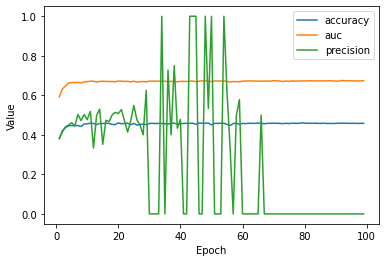

In [243]:
# Hyperparameter tuning
learning_rate = 0.02
epochs = 100
batch_size = 4000
validation_split = 0.1


# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, X_train, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy','auc','precision']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=X_test, y=y_test, batch_size=batch_size)